In [1]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('/content/Train_set.csv')
test_df = pd.read_csv('/content/Test_set.csv')

# Display the first 5 rows
print("Train DataFrame head:")
display(train_df.head())
print("\nTest DataFrame head:")
display(test_df.head())

# Print the shape of the DataFrames
print("\nTrain DataFrame shape:", train_df.shape)
print("Test DataFrame shape:", test_df.shape)

# Display data types and non-null values
print("\nTrain DataFrame info:")
train_df.info()
print("\nTest DataFrame info:")
test_df.info()

# Check for duplicate rows
print("\nTrain DataFrame duplicate rows:", train_df.duplicated().sum())
print("Test DataFrame duplicate rows:", test_df.duplicated().sum())

# Calculate and display missing values
print("\nTrain DataFrame missing values:")
print(train_df.isnull().sum())
print("\nTest DataFrame missing values:")
print(test_df.isnull().sum())

Train DataFrame head:


,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.0,Not Verified,...,0.0,0.0,39519.0,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0.0
1,14257956,18000,3 years,13.65,C,C1,<5 Years,OWN,64000.0,Verified,...,0.0,1.0,9783.0,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0.0
2,66216451,16000,3 years,7.26,A,A4,<5 Years,MORTGAGE,150000.0,Source Verified,...,2.0,0.0,13641.0,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0.0
3,46974169,25000,3 years,13.99,C,C4,NaN,MORTGAGE,59800.0,Verified,...,0.0,0.0,35020.0,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0.0
4,46725961,17000,3 years,6.39,A,A2,10+ years,MORTGAGE,72000.0,Source Verified,...,0.0,0.0,23990.0,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0.0



Test DataFrame head:


,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,...,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,4855329,12000,3 years,15.31,C,C2,<5 Years,MORTGAGE,73400.0,Not Verified,...,14.62,0.0,0.0,22156,30.0,2290.24,INDIVIDUAL,87.0,128098.0,25800.0
1,66862420,12000,3 years,7.26,A,A4,10+ years,MORTGAGE,105000.0,Not Verified,...,11.38,0.0,0.0,7592,14.0,202.68,INDIVIDUAL,13.0,269396.0,23600.0
2,3637416,15000,3 years,14.33,C,C1,6-10 years,MORTGAGE,50000.0,Verified,...,28.15,0.0,1.0,17983,19.0,1166.24,INDIVIDUAL,30.0,220135.0,34100.0
3,53682249,12000,3 years,9.99,B,B3,6-10 years,RENT,37000.0,Source Verified,...,34.32,0.0,0.0,12262,18.0,635.06,INDIVIDUAL,35.0,39436.0,21700.0
4,53937165,20150,3 years,11.53,B,B5,<5 Years,RENT,75000.0,Source Verified,...,26.74,1.0,0.0,8251,11.0,1232.84,INDIVIDUAL,31.0,52764.0,12000.0



Train DataFrame shape: (47417, 23)
Test DataFrame shape: (39933, 22)

Train DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47417 entries, 0 to 47416
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          47417 non-null  int64  
 1   loan_amnt                   47417 non-null  int64  
 2   loan_term                   47417 non-null  object 
 3   interest_rate               47417 non-null  float64
 4   loan_grade                  47417 non-null  object 
 5   loan_subgrade               47417 non-null  object 
 6   job_experience              45010 non-null  object 
 7   home_ownership              47417 non-null  object 
 8   annual_income               47417 non-null  float64
 9   income_verification_status  47417 non-null  object 
 10  loan_purpose                47417 non-null  object 
 11  state_code                  47417 non-null  object 


## Exploratory data analysis (eda)

### Subtask:
Analyze categorical features, visualize missing values and outliers, examine the target variable distribution, and visualize correlations among numerical features. Handle skewness if necessary.


**Reasoning**:
Identify categorical and numerical columns, analyze unique values and frequencies for categorical columns, and visualize missing values for both train and test datasets.



In [2]:
train_df['default'].value_counts()

,count
default,
0.0,36071
1.0,11345


In [3]:
test_df.shape

(39933, 22)

Categorical columns in train data: ['loan_term', 'loan_grade', 'loan_subgrade', 'job_experience', 'home_ownership', 'income_verification_status', 'loan_purpose', 'state_code', 'application_type']
Numerical columns in train data: ['ID', 'loan_amnt', 'interest_rate', 'annual_income', 'debt_to_income', 'delinq_2yrs', 'public_records', 'revolving_balance', 'total_acc', 'interest_receive', 'last_week_pay', 'total_current_balance', 'total_revolving_limit', 'default']

Categorical columns in test data: ['loan_term', 'loan_grade', 'loan_subgrade', 'job_experience', 'home_ownership', 'income_verification_status', 'loan_purpose', 'state_code', 'application_type']
Numerical columns in test data: ['ID', 'loan_amnt', 'interest_rate', 'annual_income', 'debt_to_income', 'delinq_2yrs', 'public_records', 'revolving_balance', 'total_acc', 'interest_receive', 'last_week_pay', 'total_current_balance', 'total_revolving_limit']

Analysis of categorical columns in train data:

Column: loan_term
Unique values

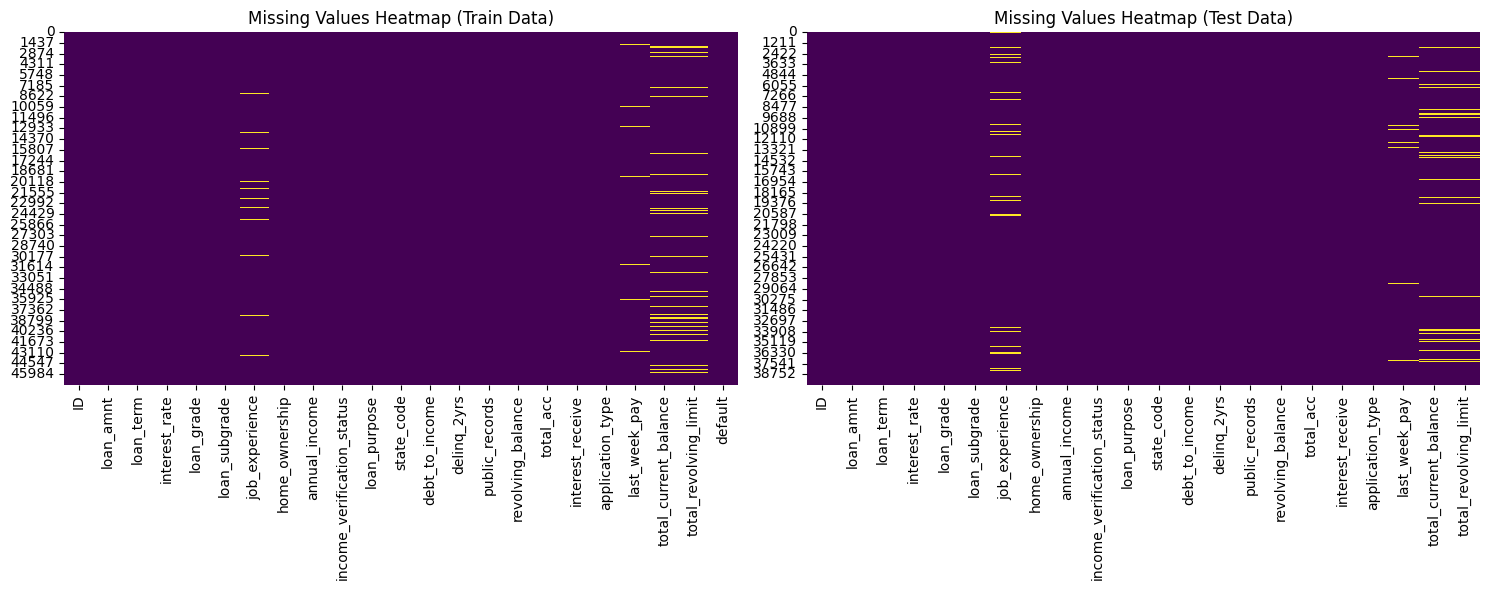

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical and numerical columns
categorical_cols_train = train_df.select_dtypes(include='object').columns
numerical_cols_train = train_df.select_dtypes(include=np.number).columns

categorical_cols_test = test_df.select_dtypes(include='object').columns
numerical_cols_test = test_df.select_dtypes(include=np.number).columns

print("Categorical columns in train data:", categorical_cols_train.tolist())
print("Numerical columns in train data:", numerical_cols_train.tolist())
print("\nCategorical columns in test data:", categorical_cols_test.tolist())
print("Numerical columns in test data:", numerical_cols_test.tolist())

# Analyze unique values and frequencies for categorical columns in train data
print("\nAnalysis of categorical columns in train data:")
for col in categorical_cols_train:
    print(f"\nColumn: {col}")
    print("Unique values:", train_df[col].unique())
    print("Value Counts:\n", train_df[col].value_counts())

# Analyze unique values and frequencies for categorical columns in test data
print("\nAnalysis of categorical columns in test data:")
for col in categorical_cols_test:
    print(f"\nColumn: {col}")
    print("Unique values:", test_df[col].unique())
    print("Value Counts:\n", test_df[col].value_counts())


# Visualize missing values
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap (Train Data)')

plt.subplot(1, 2, 2)
sns.heatmap(test_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap (Test Data)')

plt.tight_layout()
plt.show()

**Reasoning**:
Visualize the distribution of numerical features using histograms or box plots to detect outliers and understand their spread, analyze the target variable distribution, calculate and visualize the correlation matrix of numerical features, and check for skewness in numerical features.



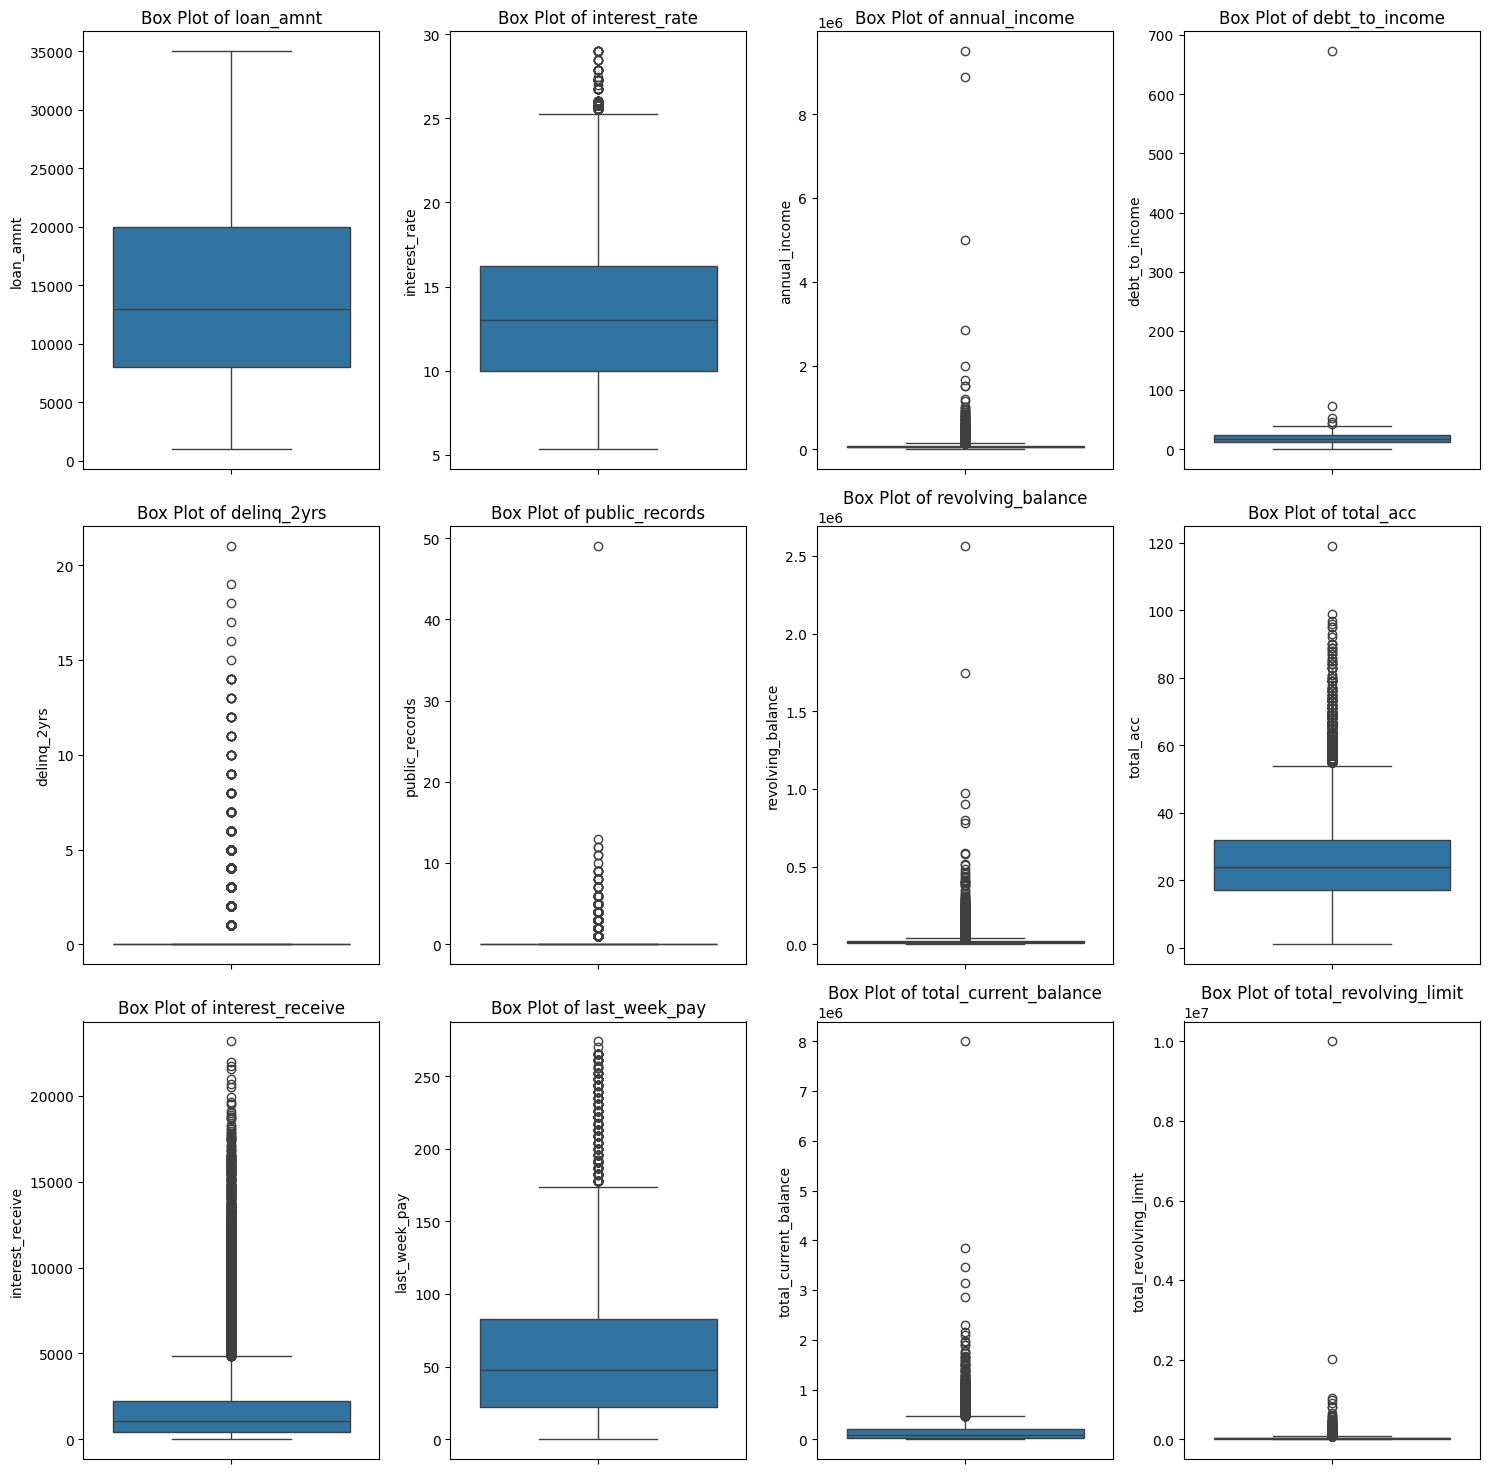

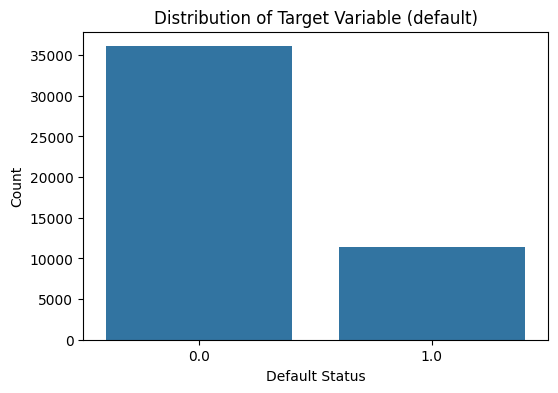

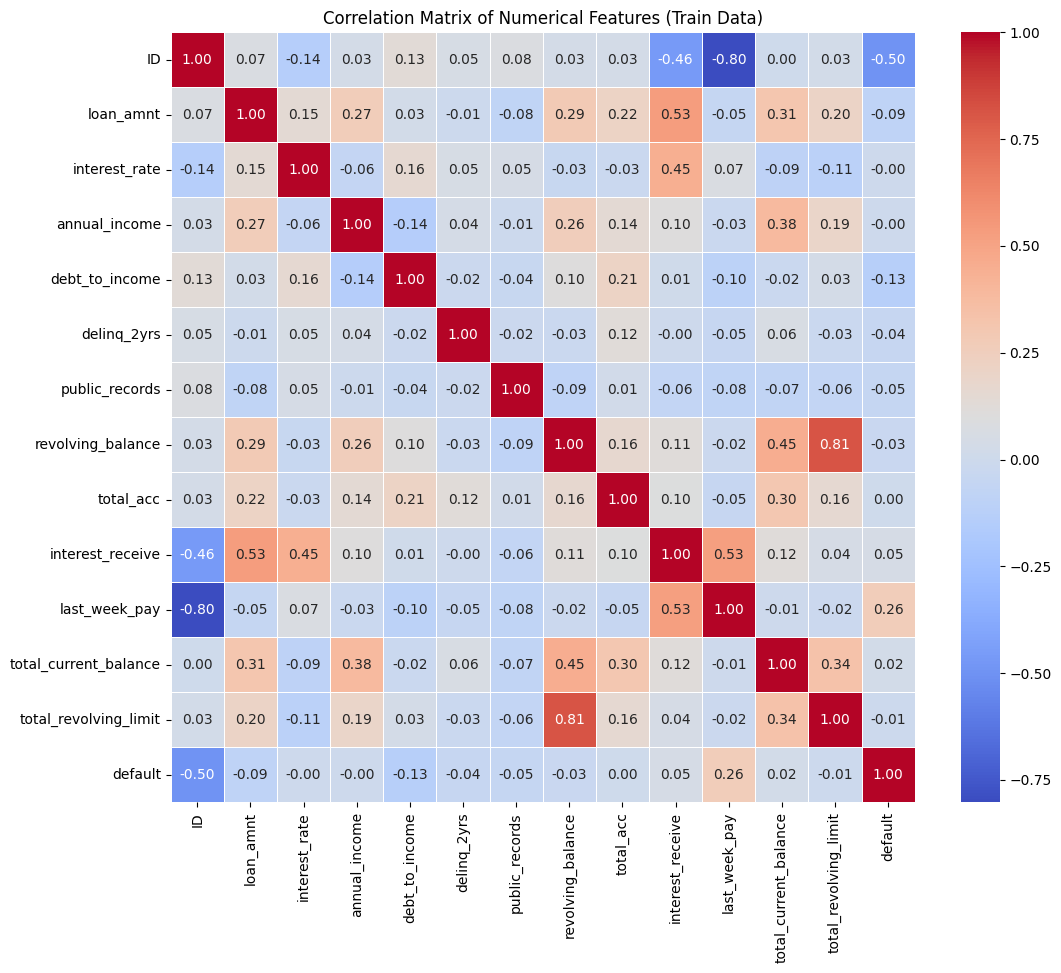


Skewness of numerical features in train data:
ID                         0.017841
loan_amnt                  0.686412
interest_rate              0.423023
annual_income             63.637862
debt_to_income             8.807359
delinq_2yrs                5.717709
public_records            15.024448
revolving_balance         32.355776
total_acc                  0.895796
interest_receive           2.881917
last_week_pay              1.005668
total_current_balance      5.528990
total_revolving_limit    116.776448
default                    1.222324
dtype: float64


In [5]:
# Visualize distributions of numerical features using box plots to detect outliers
numerical_cols_to_plot = numerical_cols_train.drop(['ID', 'default']) # Exclude ID and target

n_cols = 4
n_rows = (len(numerical_cols_to_plot) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 5))

for i, col in enumerate(numerical_cols_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=train_df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Analyze the distribution of the target variable ('default') in the training dataset
plt.figure(figsize=(6, 4))
sns.countplot(x='default', data=train_df)
plt.title('Distribution of Target Variable (default)')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.show()

# Calculate and visualize the correlation matrix of numerical features in the training data
correlation_matrix = train_df[numerical_cols_train].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features (Train Data)')
plt.show()

# Check for skewness in numerical features
skewness = train_df[numerical_cols_train].skew()
print("\nSkewness of numerical features in train data:")
print(skewness)

## Data preprocessing

### Subtask:
Handle missing values, encode categorical features, scale numerical features, and remove outliers. Save the scaler for later use.


**Reasoning**:
Handle missing values using imputation and create a new category for missing categorical values, encode categorical features using one-hot encoding, scale numerical features using StandardScaler and save the scaler, and handle outliers using clipping.



In [6]:
!pip install category_encoders

**Reasoning**:
The previous attempt failed due to a missing library. I need to correct the code to use available libraries and ensure the preprocessing steps (handling missing values, encoding, scaling, outlier handling) are correctly applied. I will use StandardScaler and OneHotEncoder from sklearn, and SimpleImputer for missing values. I will also use clipping for outlier handling as planned.



In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib
import warnings
warnings.filterwarnings("ignore")

# === 1️⃣ Define feature groups ===
label_encoded_features = ['loan_term', 'loan_grade', 'loan_subgrade', 'job_experience', 'application_type']
onehot_encoded_features = ['home_ownership', 'income_verification_status', 'loan_purpose']
target_encoded_features = ['state_code']

# Identify numerical features (excluding ID and target variable)
numerical_features = train_df.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('ID')
numerical_features.remove('default')

# === 2️⃣ Remove rows with missing target values ===
train_df = train_df.dropna(subset=['default'])

# === 3️⃣ Split data ===
X_train = train_df.drop('default', axis=1)
y_train = train_df['default'].astype(int)
X_test = test_df.copy()

# === 4️⃣ Define transformers ===
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

label_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

onehot_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

target_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('target', TargetEncoder(handle_unknown='value', handle_missing='value'))
])

# === 5️⃣ Combine all transformers ===
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('label', label_transformer, label_encoded_features),
        ('onehot', onehot_transformer, onehot_encoded_features),
        ('target', target_transformer, target_encoded_features)
    ],
    remainder='drop'
)

# === 6️⃣ Fit & transform ===
X_train_preprocessed = preprocessor.fit_transform(X_train, y_train)
X_test_preprocessed = preprocessor.transform(X_test)

# === 7️⃣ Get feature names ===
num_feature_names = numerical_features
label_feature_names = label_encoded_features
onehot_feature_names = preprocessor.named_transformers_['onehot'].named_steps['onehot'].get_feature_names_out(onehot_encoded_features)
target_feature_names = target_encoded_features
all_feature_names = list(num_feature_names) + list(label_feature_names) + list(onehot_feature_names) + list(target_feature_names)

# === 8️⃣ Convert to DataFrame ===
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=all_feature_names)

print(f"✅ Preprocessing completed!\nTrain shape: {X_train_preprocessed_df.shape}\nTest shape: {X_test_preprocessed_df.shape}")

# === 9️⃣ Save pipeline ===
joblib.dump(preprocessor, "preprocessor_pipeline.pkl")
print("🧠 Saved preprocessing pipeline as 'preprocessor_pipeline.pkl'")


✅ Preprocessing completed!
Train shape: (47416, 30)
Test shape: (39933, 30)
🧠 Saved preprocessing pipeline as 'preprocessor_pipeline.pkl'


In [8]:
X_test.shape

(39933, 22)

In [9]:
X_test_preprocessed.shape

(39933, 30)

In [10]:
from imblearn.combine import SMOTEENN
from collections import Counter

# === 1️⃣ Check original distribution ===
print("📊 Original class distribution:", Counter(y_train))

# === 2️⃣ Apply SMOTEENN ===
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train_preprocessed_df, y_train)

# === 3️⃣ Check new distribution ===
print("✅ After SMOTEENN balancing:", Counter(y_resampled))

# === 4️⃣ Convert back to DataFrame (for easy inspection or saving) ===
X_resampled_df = pd.DataFrame(X_resampled, columns=X_train_preprocessed_df.columns)
y_resampled = pd.Series(y_resampled, name='default')

print(f"\n🔹 Resampled X shape: {X_resampled_df.shape}")
print(f"🔹 Resampled y shape: {y_resampled.shape}")


📊 Original class distribution: Counter({0: 36071, 1: 11345})
✅ After SMOTEENN balancing: Counter({1: 30495, 0: 16043})

🔹 Resampled X shape: (46538, 30)
🔹 Resampled y shape: (46538,)


In [11]:
X_train.shape, X_test.shape

((47416, 22), (39933, 22))

## Model Building

### Subtask:
Split train data into X_train, X_test, y_train, y_test. Train multiple classification models and evaluate using Accuracy, Precision, Recall, F1-score, and Confusion Matrix. Compare results and choose the best-performing model.

**Reasoning**:
Split the preprocessed training data into training and validation sets, train different classification models, evaluate each model using specified metrics, and store the results in a DataFrame for comparison.

In [12]:
!pip install catboost

In [13]:
from sklearn.model_selection import train_test_split

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled  # ✅ Stratify after resampling
)

# Show the shapes and balance
print("✅ Data Shapes After Resampling and Split:")
print(f"X_train_split: {X_train_split.shape}")
print(f"X_val_split:   {X_val_split.shape}")
print(f"y_train_split: {y_train_split.shape}")
print(f"y_val_split:   {y_val_split.shape}")

print("\n🎯 Class Distribution After Resampling:")
print(y_resampled.value_counts())

✅ Data Shapes After Resampling and Split:
X_train_split: (10444, 30)
X_val_split:   (2611, 30)
y_train_split: (10444,)
y_val_split:   (2611,)

🎯 Class Distribution After Resampling:
default
1    8783
0    4272
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    ExtraTreesClassifier, AdaBoostClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import time

# === 1️⃣ Split the balanced (resampled) data ===
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)

print("✅ Data Shapes After Resampling and Split:")
print(f"X_train_split: {X_train_split.shape}")
print(f"X_val_split:   {X_val_split.shape}")
print(f"y_train_split: {y_train_split.shape}")
print(f"y_val_split:   {y_val_split.shape}")

print("\n🎯 Class Distribution After Resampling:")
print(y_resampled.value_counts())

# === 2️⃣ Initialize all models ===
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "XGBoost (GPU)": XGBClassifier(
        tree_method='hist',
        predictor='gpu_predictor',
        device='cuda',
        eval_metric='logloss',
        random_state=42
    ),
    "LightGBM (GPU)": LGBMClassifier(
        device='gpu',
        gpu_platform_id=0,
        gpu_device_id=0,
        random_state=42
    ),
    "CatBoost (GPU)": CatBoostClassifier(
        task_type='GPU',
        devices='0',
        verbose=0,
        random_state=42
    ),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_jobs=-1)
}

# === 3️⃣ Train and evaluate all models ===
results = []
for name, model in models.items():
    print(f"\n🚀 Training {name}...")
    start = time.time()
    model.fit(X_train_split, y_train_split)
    end = time.time()

    y_pred = model.predict(X_val_split)

    accuracy = accuracy_score(y_val_split, y_pred)
    precision = precision_score(y_val_split, y_pred)
    recall = recall_score(y_val_split, y_pred)
    f1 = f1_score(y_val_split, y_pred)
    cm = confusion_matrix(y_val_split, y_pred)

    results.append({
        "Model": name,
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1-score": round(f1, 4),
        "Train Time (min)": round((end - start) / 60, 2),
        "Confusion Matrix": cm.tolist()
    })

    print(f"✅ {name} - Acc: {accuracy:.4f}, Prec: {precision:.4f}, Rec: {recall:.4f}, F1: {f1:.4f}")
    print(f"⏱️ Time: {(end - start)/60:.2f} min")

# === 4️⃣ Display results ===
results_df = pd.DataFrame(results)
print("\n📊 Model Comparison (Sorted by F1-score):")
results_df = results_df.sort_values(by="F1-score", ascending=False).reset_index(drop=True)
display(results_df)


✅ Data Shapes After Resampling and Split:
X_train_split: (10444, 30)
X_val_split:   (2611, 30)
y_train_split: (10444,)
y_val_split:   (2611,)

🎯 Class Distribution After Resampling:
default
1    8783
0    4272
Name: count, dtype: int64

🚀 Training Logistic Regression...
✅ Logistic Regression - Acc: 0.7997, Prec: 0.8299, Rec: 0.8833, F1: 0.8558
⏱️ Time: 0.01 min

🚀 Training Random Forest...
✅ Random Forest - Acc: 0.9192, Prec: 0.9156, Rec: 0.9693, F1: 0.9417
⏱️ Time: 0.13 min

🚀 Training XGBoost (GPU)...
✅ XGBoost (GPU) - Acc: 0.9345, Prec: 0.9475, Rec: 0.9556, F1: 0.9515
⏱️ Time: 0.02 min

🚀 Training LightGBM (GPU)...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7026, number of negative: 3418
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 6874
[LightGBM] [Info] Number of data points in the train set: 10444, number of used features: 27
[LightGBM] [Info] Using requested OpenCL platform 0 de

In [ ]:
import pandas as pd
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier

# ======================================
# ⚙️ Step 1: Data Info
# ======================================
print(f"✅ X_train_split shape: {X_train_split.shape}")
print(f"✅ y_train_split shape: {y_train_split.shape}")
print(f"✅ X_val_split shape: {X_val_split.shape}")
print(f"✅ y_val_split shape: {y_val_split.shape}")

print(f"\n📊 Class Distribution in Train Set:")
print(y_train_split.value_counts().to_dict())

# ======================================
# 🏆 Step 2: Define Models (GPU optimized)
# ======================================
top_models = ['XGBoost', 'LightGBM', 'CatBoost', 'Extra Trees']
print(f"\n🏆 Models Selected: {top_models}")

models = {
    "XGBoost": XGBClassifier(
        device='cuda',
        tree_method='hist',
        predictor='gpu_predictor',
        eval_metric='logloss',
        random_state=42,
        use_label_encoder=False
    ),
    "LightGBM": LGBMClassifier(
        device_type='gpu',        # ✅ Correct param
        gpu_platform_id=0,
        gpu_device_id=0,
        random_state=42
    ),
    "CatBoost": CatBoostClassifier(
        task_type='GPU',
        devices='0',
        verbose=0,
        random_state=42
    ),
    "Extra Trees": ExtraTreesClassifier(
        n_jobs=-1,
        random_state=42
    )
}

# ======================================
# 🎯 Step 3: Simplified Parameter Grids
# ======================================
param_grids = {
    "XGBoost": {
        'n_estimators': [200, 400],
        'learning_rate': [0.03, 0.1],
        'max_depth': [4, 6],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    "LightGBM": {
        'n_estimators': [200, 400],
        'learning_rate': [0.03, 0.1],
        'num_leaves': [31, 63],
        'max_depth': [-1, 10],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    "CatBoost": {
        'depth': [6, 8],
        'learning_rate': [0.03, 0.1],
        'iterations': [300, 500],
        'l2_leaf_reg': [3, 5]
    },
    "Extra Trees": {
        'n_estimators': [100, 200],
        'max_depth': [None, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', None]
    }
}

# ======================================
# 🚀 Step 4: RandomizedSearchCV
# ======================================
best_models = {}

for model_name in top_models:
    print(f"\n🔍 Now tuning: {model_name}")
    model = models[model_name]
    param_grid = param_grids[model_name]

    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=3,         # faster test; increase to 10–20 for final
        scoring='f1',
        cv=2,             # 2-fold for speed (change to 3–5 for final)
        verbose=1,
        random_state=42,
        n_jobs=-1 if model_name == "Extra Trees" else 1
    )

    start_time = time.time()
    random_search.fit(X_train_split, y_train_split)
    duration = (time.time() - start_time) / 60

    best_models[model_name] = random_search.best_estimator_
    print(f"✅ Best Params for {model_name}: {random_search.best_params_}")
    print(f"🏁 Best F1 Score: {random_search.best_score_:.4f}")
    print(f"⏱️ Time Taken: {duration:.2f} minutes")

# ======================================
# 📊 Step 5: Evaluation on Validation Set
# ======================================
results = []

for name, tuned_model in best_models.items():
    print(f"\n📈 Evaluating {name}...")
    y_pred = tuned_model.predict(X_val_split)

    acc = accuracy_score(y_val_split, y_pred)
    prec = precision_score(y_val_split, y_pred)
    rec = recall_score(y_val_split, y_pred)
    f1 = f1_score(y_val_split, y_pred)
    cm = confusion_matrix(y_val_split, y_pred)

    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1-score": round(f1, 4),
        "Confusion Matrix": cm.tolist()
    })

results_df = pd.DataFrame(results).sort_values(by='F1-score', ascending=False)
print("\n📊 Final Tuned Model Comparison (sorted by F1-score):")
display(results_df)

best_model_name = results_df.iloc[0]['Model']
print(f"\n🏅 Best Model after Tuning: {best_model_name}")


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# ======================================
# ⚙️ Step 6: Final Training for LightGBM
# ======================================

# 🏆 Best params from tuning
best_lgb_params = {
    'learning_rate': 0.1,
    'n_estimators': 200,
    'max_depth': 10,
    'num_leaves': 63,
    'subsample': 0.8,
    'colsample_bytree': 1.0,
    'device_type': 'gpu',      # ✅ Enables GPU acceleration
    'gpu_platform_id': 0,
    'gpu_device_id': 0,
    'random_state': 42
}

# ⚙️ Initialize final LightGBM model
final_lgbm = LGBMClassifier(**best_lgb_params)

# 🚀 Train on full preprocessed training data
print("\n🚀 Training final LightGBM model on full training data...")
start = time.time()
final_lgbm.fit(X_train_split, y_train_split)
end = time.time()
print(f"✅ Training complete! Time taken: {(end - start)/60:.2f} minutes\n")

# 🎯 Evaluate on validation data
y_pred_final = final_lgbm.predict(X_val_split)

# 📊 Compute metrics
accuracy = accuracy_score(y_val_split, y_pred_final)
precision = precision_score(y_val_split, y_pred_final)
recall = recall_score(y_val_split, y_pred_final)
f1 = f1_score(y_val_split, y_pred_final)
cm = confusion_matrix(y_val_split, y_pred_final)

# 🧾 Print final performance
print("📈 Final LightGBM Model Evaluation:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"Confusion Matrix:\n{cm}")


In [ ]:
X_test_preprocessed_df.shape

In [ ]:
print("\n🧠 Generating predictions on test data...")
y_test_pred = final_lgbm.predict(X_test_preprocessed_df)  # ✅ Correct variable

# ======================================
# 📁 Step 6: Create Submission File
# ======================================
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'default': y_test_pred.astype(int)   # ✅ Use test predictions, not validation predictions
})

# ✅ Validation checks
expected_rows = 13741   # ✅ Update based on your actual test_df length
expected_columns = ['ID', 'default']

print("\n🔍 Validating submission format...")

if submission.shape[0] != expected_rows:
    raise ValueError(f"❌ Expected {expected_rows} rows, but got {submission.shape[0]}.")

if list(submission.columns) != expected_columns:
    raise ValueError(f"❌ Expected columns {expected_columns}, but got {list(submission.columns)}.")

if submission.isnull().any().any():
    raise ValueError("❌ Submission file contains missing values!")

# ✅ Save submission
submission.to_csv("submission.csv", index=False)
print("\n✅ Submission file saved successfully as 'submission.csv'")
print(f"📊 Shape: {submission.shape}")
print(f"📈 Default Value Distribution:\n{submission['default'].value_counts()}")


In [ ]:
submission_df = pd.read_csv("/content/submission.csv")
submission_df.shape